# Ensemble Learning

## Weighted Mean Ensemble

In [1]:
from models.ensemble_weighted_mean import EnsembleWeightedMean

ensemble_direct_optimization = EnsembleWeightedMean(optimization=True)
ensemble_direct_optimization_with_features = EnsembleWeightedMean(optimization=True, with_features=True)
ensemble_weigthed_mean = EnsembleWeightedMean(optimization=False)

data = 'ensemble-pd-hek293t-pe2.csv'

ensemble_direct_optimization.fit(data)
direct_optimization_performance = ensemble_direct_optimization.test(data) 

ensemble_weigthed_mean.fit(data)
weighted_mean_performance = ensemble_weigthed_mean.test(data)

ensemble_direct_optimization_with_features.fit(data)
with_features_performance = ensemble_direct_optimization_with_features.test(data)

Training Ensemble
  epoch    train_loss    valid_loss    cp     dur
-------  ------------  ------------  ----  ------
      1      755.8152      272.8594     +  0.4104
      2      431.9329      726.2324        0.1567
      3      176.2978      265.1272     +  0.1487
      4      194.2205      284.7998        0.1614
      5      152.5140      280.3324        0.3168
      6      144.8839      253.4539     +  0.1654
      7      131.6154      236.0810     +  0.1769
      8      132.8533      235.0223     +  0.3330
      9      130.1241      232.5447     +  0.1945
     10      126.1316      223.5701     +  0.1834
     11      126.2828      222.2504     +  0.2965
     12      124.4471      218.3700     +  0.1774
     13      122.9154      214.1604     +  0.1739
     14      122.3356      211.9355     +  0.3433
     15      120.9296      208.4738     +  0.1653
     16      120.1357      205.8650     +  0.3222
     17      119.2724      203.3585     +  0.1754
     18      118.4011      200.8

Pearson


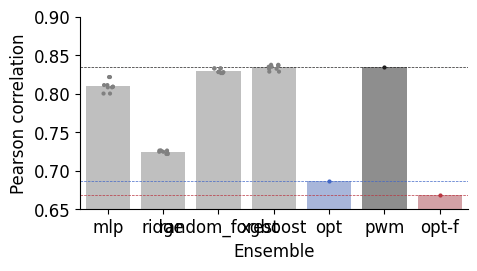

opt vs mlp t-statistic: -16.198036648700423, p-value: 5.7779587331982344e-08
Significant
opt vs ridge t-statistic: -19.916324984802742, p-value: 9.421516391737698e-09
Significant
opt vs random_forest t-statistic: -50.94214586690589, p-value: 2.1728244784869356e-12
Significant
opt vs xgboost t-statistic: -41.52256498623084, p-value: 1.3585099251082114e-11
Significant
pwm vs mlp t-statistic: 3.2831328399141975, p-value: 0.009481718536601768
Significant
pwm vs ridge t-statistic: 58.74123897437181, p-value: 6.049992144772914e-13
Significant
pwm vs random_forest t-statistic: 1.872053769366249, p-value: 0.09399029312533444
Not significant
pwm vs xgboost t-statistic: 0.2835192043103036, p-value: 0.7831927452590355
Not significant
opt-f vs mlp t-statistic: -18.596042399165654, p-value: 1.723576689581965e-08
Significant
opt-f vs ridge t-statistic: -29.59856150566065, p-value: 2.8007568935133133e-10
Significant
opt-f vs random_forest t-statistic: -57.44323167225328, p-value: 7.394038627335484e-1

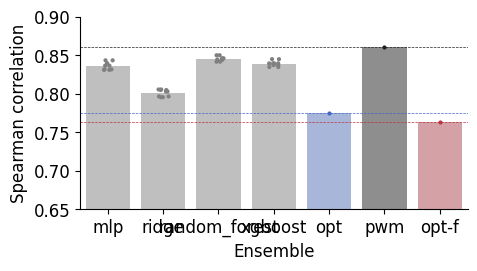

opt vs mlp t-statistic: -11.83657848688784, p-value: 8.653145316401966e-07
Significant
opt vs ridge t-statistic: -5.5583273282687085, p-value: 0.0003526314433670571
Significant
opt vs random_forest t-statistic: -22.99863907249223, p-value: 2.6398062970504686e-09
Significant
opt vs xgboost t-statistic: -17.281721432239834, p-value: 3.2796567260121486e-08
Significant
pwm vs mlp t-statistic: 4.581492593999663, p-value: 0.0013249948404954975
Significant
pwm vs ridge t-statistic: 12.590901776095492, p-value: 5.107601766575595e-07
Significant
pwm vs random_forest t-statistic: 4.8403332677536515, p-value: 0.0009205978854762274
Significant
pwm vs xgboost t-statistic: 5.648845989295505, p-value: 0.00031406226902424666
Significant
opt-f vs mlp t-statistic: -14.120847720393538, p-value: 1.9039946066188577e-07
Significant
opt-f vs ridge t-statistic: -8.083455003176073, p-value: 2.0371648760408007e-05
Significant
opt-f vs random_forest t-statistic: -26.87191430049802, p-value: 6.624828923071171e-10

In [ ]:
import numpy as np
import pandas as pd
from os.path import join as pjoin

direct_op_pearson, direct_op_spearman = direct_optimization_performance
performance_weighted_pearson, performance_weighted_spearman = weighted_mean_performance
performance_with_features_pearson, performance_with_features_spearman = with_features_performance

# join the performance values, ignore the common keys
direct_op_pearson.update(performance_weighted_pearson)
direct_op_spearman.update(performance_weighted_spearman)

direct_op_pearson.update(performance_with_features_pearson)
direct_op_spearman.update(performance_with_features_spearman)

performance_pearson = direct_op_pearson
performance_spearman = direct_op_spearman

# plot the performance as bar plot
import matplotlib.pyplot as plt
import seaborn as sns

alpha = 0.5
f_size = 12
# plot the bar plot on top of the strip plot
# bar plot should be shortened to emphasize the difference in values
for name, performance in zip(['Pearson', 'Spearman'], [performance_pearson, performance_spearman]):
    # performance = pd.DataFrame({'Models': list(performance.keys()), 'Performance': list(performance.values()), 'Category': [0 if 'op' in model or 'pwm' in model else 1 for model in performance.keys()]})
    # print(performance)
    # add a category column
    print(name)
    fig, ax = plt.subplots(figsize=(5, 2.5))
    ax.set_ylim(0.65, 0.9)
    colour_palette = iter(sns.color_palette('icefire', n_colors=3))
    colours = ['gray' if not ('opt' in model or 'pwm' in model) else next(colour_palette) for model in performance.keys()]
    sns.stripplot(data=performance, ax=ax, alpha=1, jitter=0.1, size=3, palette=colours)
    sns.barplot(data=performance, ax=ax, alpha=alpha, palette=colours, errorbar=None)
    ax.set_xlabel('Ensemble', fontsize=f_size)
    ax.set_ylabel(f'{name} correlation', fontsize=f_size)
    ax.tick_params(axis='both', which='major', labelsize=f_size)
    ax.tick_params(axis='both', which='minor', labelsize=f_size)
    # remove top and right spines
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    # show a horizontal line at the mean for 'opt', 'pwm' models of matching color
    for ind, model in enumerate(performance.keys()):
        if 'opt' in model or 'pwm' in model:
            ax.axhline(y=performance[model], color=colours[ind], linestyle='--', linewidth=0.5)
    # rotate the x tick labels
    plt.show()
    
    # perform paired t-test between opt pwm models and the rest
    from scipy.stats import ttest_ind
    opt_pwm_values = {model: performance[model] for model in performance.keys() if 'opt' in model or 'pwm' in model}
    rest_values = {model: performance[model] for model in performance.keys() if not ('opt' in model or 'pwm' in model)}

    for opt_pwm, performance_opt_pwm in zip(opt_pwm_values.keys(), opt_pwm_values.values()):
        for rest, performance_rest in zip(rest_values.keys(), rest_values.values()):
            t_stat, p_value = ttest_ind(performance_opt_pwm, performance_rest)
            print(f'{opt_pwm} vs {rest} t-statistic: {t_stat}, p-value: {p_value}')
            if p_value < 0.05:
                print('Significant')
            else:
                print('Not significant')
                
    # save the figure
    fig.savefig(pjoin('dissertation', 'figures', f'ensemble_{name.lower()}.pdf'), bbox_inches='tight')